# **Web Scrapping of News Articles for Stocks of Reliance Google Microsoft **

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

def scrape_news(query, start_date, end_date):
    articles = []
    url = f"https://news.google.com/rss/search?q={query}+after:{start_date}+before:{end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')

    for item in items:
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text
        articles.append({'title': title, 'link': link, 'pub_date': pub_date})
    return pd.DataFrame(articles)

def scrape_news_over_date_range(query, start_date, end_date):
    # Convert start and end dates to datetime objects
    start_date_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    end_date_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')

    # Initialize an empty DataFrame to store all articles
    all_articles = pd.DataFrame()

    # Loop through each month in the date range
    current_date = start_date_dt
    while current_date < end_date_dt:
        # Define the next month's start date
        next_date = current_date + datetime.timedelta(days=30)

        # Ensure the end date does not go beyond the specified end_date
        if next_date > end_date_dt:
            next_date = end_date_dt

        # Format dates to strings
        start_str = current_date.strftime('%Y-%m-%d')
        end_str = next_date.strftime('%Y-%m-%d')

        # Scrape news for the current month
        month_articles = scrape_news(query, start_str, end_str)

        # Append month articles to the all_articles DataFrame
        all_articles = pd.concat([all_articles, month_articles], ignore_index=True)

        # Move to the next month
        current_date = next_date

    return all_articles

# Define the date range and queries
start_date = '2020-01-01'
end_date = '2022-12-31'
queries = ["Reliance", "Microsoft", "Google"]

# Loop through each query and scrape news articles
for query in queries:
    articles = scrape_news_over_date_range(query, start_date, end_date)
    output_csv = f"{query}.csv"
    articles.to_csv(output_csv, index=False)
    print(f"Saved {query} articles to {output_csv}")


Saved Reliance articles to Reliance.csv
Saved Microsoft articles to Microsoft.csv
Saved Google articles to Google.csv


In [ ]:
news_df1 = pd.read_csv('Reliance.csv')
news_df2 = pd.read_csv('Microsoft.csv')
news_df3 = pd.read_csv('Google.csv')



In [ ]:
news_df1.head()

,title,link,pub_date
0,"As North Korea Reverts to Self-Reliance, Exper...",https://news.google.com/rss/articles/CBMieWh0d...,"Mon, 27 Jan 2020 08:00:00 GMT"
1,How Asia's Smartest Businessman Plans To Power...,https://news.google.com/rss/articles/CBMiiAFod...,"Thu, 30 Jan 2020 08:00:00 GMT"
2,Reliance Steel & Aluminum Co. Completes Acquis...,https://news.google.com/rss/articles/CBMijQFod...,"Thu, 02 Jan 2020 08:00:00 GMT"
3,Reliance on imports for e-mobility could cause...,https://news.google.com/rss/articles/CBMicmh0d...,"Mon, 13 Jan 2020 08:00:00 GMT"
4,Reliance Steel (RS) Completes Buyout of Fry St...,https://news.google.com/rss/articles/CBMiUGh0d...,"Fri, 03 Jan 2020 08:00:00 GMT"


In [ ]:
news_df2.head()

,title,link,pub_date
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,"Thu, 16 Jan 2020 08:00:00 GMT"
1,The IRS Decided to Get Tough Against Microsoft...,https://news.google.com/rss/articles/CBMiZ2h0d...,"Wed, 22 Jan 2020 08:00:00 GMT"
2,Microsoft Security Shocker As 250 Million Cust...,https://news.google.com/rss/articles/CBMifmh0d...,"Wed, 22 Jan 2020 08:00:00 GMT"
3,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,"Thu, 16 Jan 2020 08:00:00 GMT"
4,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,"Thu, 16 Jan 2020 08:00:00 GMT"


In [ ]:
news_df3.head()

,title,link,pub_date
0,A more helpful Google Assistant for your every...,https://news.google.com/rss/articles/CBMiQWh0d...,"Tue, 07 Jan 2020 08:00:00 GMT"
1,Why retailers should lean into personalization...,https://news.google.com/rss/articles/CBMiiAFod...,"Sun, 19 Jan 2020 08:00:00 GMT"
2,Activision Blizzard And Google Enter Into Mult...,https://news.google.com/rss/articles/CBMiowFod...,"Fri, 24 Jan 2020 08:00:00 GMT"
3,When better isn't good enough: Why I tell my G...,https://news.google.com/rss/articles/CBMigAFod...,"Wed, 08 Jan 2020 08:00:00 GMT"
4,WTF is Google's Privacy Sandbox? - Digiday,https://news.google.com/rss/articles/CBMiOmh0d...,"Fri, 17 Jan 2020 08:00:00 GMT"


# **Applying NLP for pre processing of news text**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

news_df1['cleaned_text'] = news_df1['title'].apply(clean_text)
news_df2['cleaned_text'] = news_df2['title'].apply(clean_text)
news_df3['cleaned_text'] = news_df3['title'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
news_df1.head()

,title,link,pub_date,cleaned_text
0,"As North Korea Reverts to Self-Reliance, Exper...",https://news.google.com/rss/articles/CBMieWh0d...,"Mon, 27 Jan 2020 08:00:00 GMT",north korea reverts self reliance experts urge...
1,How Asia's Smartest Businessman Plans To Power...,https://news.google.com/rss/articles/CBMiiAFod...,"Thu, 30 Jan 2020 08:00:00 GMT",asia smartest businessman plans power clean pl...
2,Reliance Steel & Aluminum Co. Completes Acquis...,https://news.google.com/rss/articles/CBMijQFod...,"Thu, 02 Jan 2020 08:00:00 GMT",reliance steel aluminum co completes acquisiti...
3,Reliance on imports for e-mobility could cause...,https://news.google.com/rss/articles/CBMicmh0d...,"Mon, 13 Jan 2020 08:00:00 GMT",reliance imports e mobility could cause major ...
4,Reliance Steel (RS) Completes Buyout of Fry St...,https://news.google.com/rss/articles/CBMiUGh0d...,"Fri, 03 Jan 2020 08:00:00 GMT",reliance steel rs completes buyout fry steel c...


In [ ]:
news_df2.head()

,title,link,pub_date,cleaned_text
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,"Thu, 16 Jan 2020 08:00:00 GMT",microsoft carbon negative 2030 official micros...
1,The IRS Decided to Get Tough Against Microsoft...,https://news.google.com/rss/articles/CBMiZ2h0d...,"Wed, 22 Jan 2020 08:00:00 GMT",irs decided get tough microsoft microsoft got ...
2,Microsoft Security Shocker As 250 Million Cust...,https://news.google.com/rss/articles/CBMifmh0d...,"Wed, 22 Jan 2020 08:00:00 GMT",microsoft security shocker 250 million custome...
3,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,"Thu, 16 Jan 2020 08:00:00 GMT",microsoft makes carbon negative pledge bbc com
4,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,"Thu, 16 Jan 2020 08:00:00 GMT",microsoft raises stakes corporate climate pled...


In [ ]:
news_df3.head()

,title,link,pub_date,cleaned_text
0,A more helpful Google Assistant for your every...,https://news.google.com/rss/articles/CBMiQWh0d...,"Tue, 07 Jan 2020 08:00:00 GMT",helpful google assistant every day keyword goo...
1,Why retailers should lean into personalization...,https://news.google.com/rss/articles/CBMiiAFod...,"Sun, 19 Jan 2020 08:00:00 GMT",retailers lean personalization think google
2,Activision Blizzard And Google Enter Into Mult...,https://news.google.com/rss/articles/CBMiowFod...,"Fri, 24 Jan 2020 08:00:00 GMT",activision blizzard google enter multi year st...
3,When better isn't good enough: Why I tell my G...,https://news.google.com/rss/articles/CBMigAFod...,"Wed, 08 Jan 2020 08:00:00 GMT",better good enough tell google co workers indu...
4,WTF is Google's Privacy Sandbox? - Digiday,https://news.google.com/rss/articles/CBMiOmh0d...,"Fri, 17 Jan 2020 08:00:00 GMT",wtf google privacy sandbox digiday


# **Extracting the details of Adani's stock price from 1st jan 2021 to 31st Dec 2023**

In [ ]:
import yfinance as yf
import pandas as pd
import datetime

# Define the date range
start_date = '2020-01-01'
end_date = '2022-12-31'

# Define stock symbols for the companies
stock_symbols = {
    'Reliance': 'RELIANCE.NS',
    'Microsoft': 'MSFT',
    'Google': 'GOOGL'
}

# Download and save historical stock prices for each company
for company, symbol in stock_symbols.items():
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)
    output_csv = f'{company}_stock_prices.csv'
    stock_data.to_csv(output_csv, index=False)
    print(f"Saved {company} stock prices to {output_csv}")

# Display the first few rows of each stock price dataset
for company in stock_symbols.keys():
    stock_df = pd.read_csv(f'{company}_stock_prices.csv')
    print(f"\n{company} Stock Prices:")
    print(stock_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Saved Reliance stock prices to Reliance_stock_prices.csv
Saved Microsoft stock prices to Microsoft_stock_prices.csv


[*********************100%%**********************]  1 of 1 completed

Saved Google stock prices to Google_stock_prices.csv

Reliance Stock Prices:
         Date         Open         High          Low        Close  \
0  2020-01-01  1387.957031  1396.277466  1376.527954  1380.276611   
1  2020-01-02  1382.471069  1408.941040  1382.471069  1403.775024   
2  2020-01-03  1401.671997  1409.581055  1392.528687  1405.466553   
3  2020-01-06  1389.785767  1397.008911  1369.670410  1372.870605   
4  2020-01-07  1388.871338  1403.043579  1383.842529  1393.991699   

     Adj Close    Volume  
0  1360.645142   7002234  
1  1383.809448   8855158  
2  1385.476807  10492349  
3  1353.344482  12259588  
4  1374.165161   8341811  

Microsoft Stock Prices:
         Date        Open        High         Low       Close   Adj Close  \
0  2020-01-02  158.779999  160.729996  158.330002  160.619995  154.493851   
1  2020-01-03  158.320007  159.949997  158.059998  158.619995  152.570099   
2  2020-01-06  157.080002  159.100006  156.509995  159.029999  152.964508   
3  2020-01-07

In [ ]:
stock_df1 = pd.read_csv('Reliance_stock_prices.csv')
stock_df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611,1360.645142,7002234
1,2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024,1383.809448,8855158
2,2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553,1385.476807,10492349
3,2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605,1353.344482,12259588
4,2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699,1374.165161,8341811


In [ ]:
stock_df2 = pd.read_csv('Microsoft_stock_prices.csv')
stock_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.493851,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.570099,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,152.964508,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.569778,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,153.984039,27746500


In [ ]:
stock_df3 = pd.read_csv('Google_stock_prices.csv')
stock_df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.420502,68.433998,67.324501,68.433998,68.355545,27278000
1,2020-01-03,67.400002,68.687500,67.365997,68.075996,67.997955,23408000
2,2020-01-06,67.581497,69.916000,67.550003,69.890503,69.810379,46768000
3,2020-01-07,70.023003,70.175003,69.578003,69.755501,69.675537,34330000
4,2020-01-08,69.740997,70.592499,69.631500,70.251999,70.171463,35314000


# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df1['sentiment'] = news_df1['cleaned_text'].apply(get_sentiment)
news_df2['sentiment'] = news_df2['cleaned_text'].apply(get_sentiment)
news_df3['sentiment'] = news_df3['cleaned_text'].apply(get_sentiment)

# **Merge all csv files into final one**

In [ ]:
def merge_data(news_df, stock_df, company):
    news_df['pub_date'] = pd.to_datetime(news_df['pub_date']).dt.date
    stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

    # Merge data on the date
    merged_df = pd.merge(news_df, stock_df, left_on='pub_date', right_on='Date', how='inner')

    # Check if merged_df is empty
    if merged_df.empty:
        print(f"The merged DataFrame for {company} is empty. Please check the date ranges and formats.")
    else:
        output_csv = f'merged_data_{company}.csv'
        merged_df.to_csv(output_csv, index=False)
        print(f"Merged data for {company}:")
        print(merged_df.head())

    return merged_df # Add this line to return the merged DataFrame

# Merge datasets for each company and store them in variables|
merged_df1 = merge_data(news_df1, stock_df1, 'Reliance')
merged_df2 = merge_data(news_df2, stock_df2, 'Microsoft')
merged_df3 = merge_data(news_df3, stock_df3, 'Google')

Merged data for Reliance:
                                               title  \
0  As North Korea Reverts to Self-Reliance, Exper...   
1  Satellites at war: A week of U.S.-Iran tension...   
2  How Asia's Smartest Businessman Plans To Power...   
3  Lexington Place in Jonesboro closing, moving r...   
4  Korea urged to join CPTPP to cut reliance on C...   

                                                link    pub_date  \
0  https://news.google.com/rss/articles/CBMieWh0d...  2020-01-27   
1  https://news.google.com/rss/articles/CBMiZmh0d...  2020-01-27   
2  https://news.google.com/rss/articles/CBMiiAFod...  2020-01-30   
3  https://news.google.com/rss/articles/CBMiWGh0d...  2020-01-30   
4  https://news.google.com/rss/articles/CBMiPGh0d...  2020-01-30   

                                        cleaned_text  sentiment        Date  \
0  north korea reverts self reliance experts urge...   0.000000  2020-01-27   
1  satellites war week u iran tensions sum milita...  -0.100000  2020-

Text(0, 0.5, 'Sentiment')

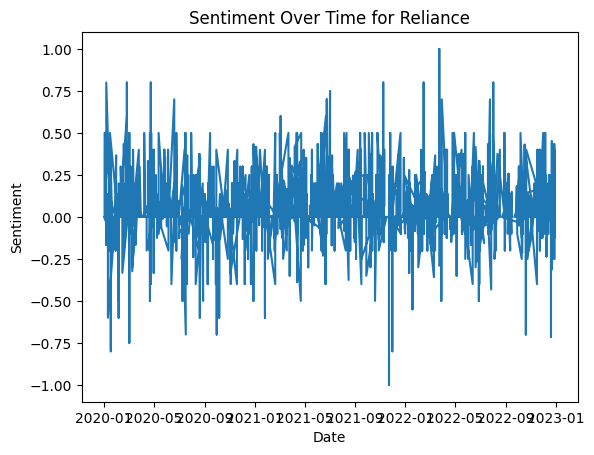

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged_df1['Date'],merged_df1['sentiment'])
plt.title(f'Sentiment Over Time for Reliance')
plt.xlabel('Date')
plt.ylabel('Sentiment')

In [ ]:
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,2020-01-16,microsoft carbon negative 2030 official micros...,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
1,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,2020-01-16,microsoft makes carbon negative pledge bbc com,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
2,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,2020-01-16,microsoft raises stakes corporate climate pled...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
3,Microsoft pledges to be 'carbon negative' by 2...,https://news.google.com/rss/articles/CBMiW2h0d...,2020-01-16,microsoft pledges carbon negative 2030 guardian,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
4,Microsoft Sustainability Calculator helps ente...,https://news.google.com/rss/articles/CBMilQFod...,2020-01-16,microsoft sustainability calculator helps ente...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
...,...,...,...,...,...,...,...,...,...,...,...,...
3534,Microsoft Edge is actually good - The Verge,https://news.google.com/rss/articles/CBMiWWh0d...,2022-12-27,microsoft edge actually good verge,0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600
3535,Did Microsoft make a bad $69B bet on Activisio...,https://news.google.com/rss/articles/CBMiamh0d...,2022-12-27,microsoft make bad 69b bet activision blizzard...,-0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600
3536,'There's a career in cybersecurity for everyon...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,career cybersecurity everyone microsoft securi...,0.0,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600
3537,TCS launches Free Quantum Education Program Fo...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,tcs launches free quantum education program mi...,0.4,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600


Text(0, 0.5, 'Sentiment')

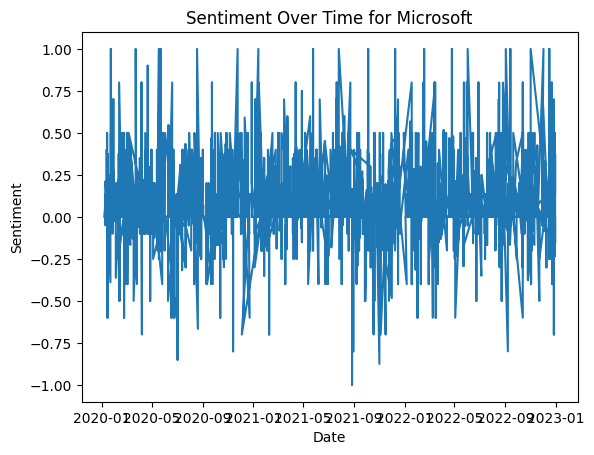

In [ ]:
plt.plot(merged_df2['Date'],merged_df2['sentiment'])
plt.title(f'Sentiment Over Time for Microsoft')
plt.xlabel('Date')
plt.ylabel('Sentiment')

Text(0, 0.5, 'Sentiment')

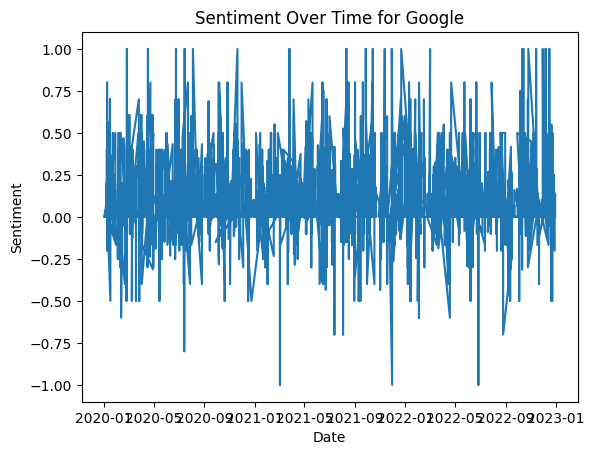

In [ ]:
plt.plot(merged_df3['Date'],merged_df3['sentiment'])
plt.title(f'Sentiment Over Time for Google')
plt.xlabel('Date')
plt.ylabel('Sentiment')


In [ ]:
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,2020-01-16,microsoft carbon negative 2030 official micros...,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
1,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,2020-01-16,microsoft makes carbon negative pledge bbc com,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
2,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,2020-01-16,microsoft raises stakes corporate climate pled...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
3,Microsoft pledges to be 'carbon negative' by 2...,https://news.google.com/rss/articles/CBMiW2h0d...,2020-01-16,microsoft pledges carbon negative 2030 guardian,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
4,Microsoft Sustainability Calculator helps ente...,https://news.google.com/rss/articles/CBMilQFod...,2020-01-16,microsoft sustainability calculator helps ente...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400
...,...,...,...,...,...,...,...,...,...,...,...,...
3534,Microsoft Edge is actually good - The Verge,https://news.google.com/rss/articles/CBMiWWh0d...,2022-12-27,microsoft edge actually good verge,0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600
3535,Did Microsoft make a bad $69B bet on Activisio...,https://news.google.com/rss/articles/CBMiamh0d...,2022-12-27,microsoft make bad 69b bet activision blizzard...,-0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600
3536,'There's a career in cybersecurity for everyon...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,career cybersecurity everyone microsoft securi...,0.0,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600
3537,TCS launches Free Quantum Education Program Fo...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,tcs launches free quantum education program mi...,0.4,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600


In [ ]:
# Example function to calculate price movement
def calculate_price_movement(row, horizon_days=1):
    pub_date = row['pub_date']
    future_date = pub_date + datetime.timedelta(days=horizon_days)

    # Convert future_date to string to match stock_df['Date']
    future_date_str = future_date.strftime('%Y-%m-%d')

    # Fetch future_price from stock_df
    future_price = stock_df.loc[stock_df['Date'] == future_date_str, 'Close'].values
    if len(future_price) == 0:
        return None

    future_price = future_price[0]
    current_price = row['Close']

    if future_price > current_price:
        return 'increase'
    elif future_price < current_price:
        return 'decrease'
    else:
        return 'no change'



In [ ]:
merged_df1


,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
0,"As North Korea Reverts to Self-Reliance, Exper...",https://news.google.com/rss/articles/CBMieWh0d...,2020-01-27,north korea reverts self reliance experts urge...,0.000000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,1357.896118,6693875
1,Satellites at war: A week of U.S.-Iran tension...,https://news.google.com/rss/articles/CBMiZmh0d...,2020-01-27,satellites war week u iran tensions sum milita...,-0.100000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,1357.896118,6693875
2,How Asia's Smartest Businessman Plans To Power...,https://news.google.com/rss/articles/CBMiiAFod...,2020-01-30,asia smartest businessman plans power clean pl...,0.366667,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,1301.292725,11201344
3,"Lexington Place in Jonesboro closing, moving r...",https://news.google.com/rss/articles/CBMiWGh0d...,2020-01-30,lexington place jonesboro closing moving resid...,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,1301.292725,11201344
4,Korea urged to join CPTPP to cut reliance on C...,https://news.google.com/rss/articles/CBMiPGh0d...,2020-01-30,korea urged join cptpp cut reliance china 코리아타임스,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,1301.292725,11201344
...,...,...,...,...,...,...,...,...,...,...,...,...
3064,Reliance Family Day 2022: What Mukesh Ambani E...,https://news.google.com/rss/articles/CBMia2h0d...,2022-12-29,reliance family day 2022 mukesh ambani expects...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,2339.201904,3465324
3065,NCLT approves Swan Energy plan to acquire Reli...,https://news.google.com/rss/articles/CBMigQFod...,2022-12-29,nclt approves swan energy plan acquire relianc...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,2339.201904,3465324
3066,Mukesh Ambani sets targets for kids in success...,https://news.google.com/rss/articles/CBMibmh0d...,2022-12-29,mukesh ambani sets targets kids succession pla...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,2339.201904,3465324
3067,Will Reliance Industries' stock finally hit Rs...,https://news.google.com/rss/articles/CBMinwFod...,2022-12-26,reliance industries stock finally hit rs 3000 ...,0.000000,2022-12-26,2321.113525,2346.265137,2300.484375,2329.697266,2321.496582,2995121


In [ ]:
# Apply the function to the merged DataFrame
merged_df1['price_movement'] = merged_df1.apply(calculate_price_movement, axis=1, result_type='reduce') # Force the result to be a Series
merged_df1.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df1.to_csv('labeled_data1.csv', index=False)

In [ ]:
merged_df1

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
0,"As North Korea Reverts to Self-Reliance, Exper...",https://news.google.com/rss/articles/CBMieWh0d...,2020-01-27,north korea reverts self reliance experts urge...,0.000000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,1357.896118,6693875,decrease
1,Satellites at war: A week of U.S.-Iran tension...,https://news.google.com/rss/articles/CBMiZmh0d...,2020-01-27,satellites war week u iran tensions sum milita...,-0.100000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,1357.896118,6693875,decrease
2,How Asia's Smartest Businessman Plans To Power...,https://news.google.com/rss/articles/CBMiiAFod...,2020-01-30,asia smartest businessman plans power clean pl...,0.366667,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,1301.292725,11201344,decrease
3,"Lexington Place in Jonesboro closing, moving r...",https://news.google.com/rss/articles/CBMiWGh0d...,2020-01-30,lexington place jonesboro closing moving resid...,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,1301.292725,11201344,decrease
4,Korea urged to join CPTPP to cut reliance on C...,https://news.google.com/rss/articles/CBMiPGh0d...,2020-01-30,korea urged join cptpp cut reliance china 코리아타임스,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,1301.292725,11201344,decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,Reliance Family Day 2022: What Mukesh Ambani E...,https://news.google.com/rss/articles/CBMia2h0d...,2022-12-29,reliance family day 2022 mukesh ambani expects...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,2339.201904,3465324,decrease
3065,NCLT approves Swan Energy plan to acquire Reli...,https://news.google.com/rss/articles/CBMigQFod...,2022-12-29,nclt approves swan energy plan acquire relianc...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,2339.201904,3465324,decrease
3066,Mukesh Ambani sets targets for kids in success...,https://news.google.com/rss/articles/CBMibmh0d...,2022-12-29,mukesh ambani sets targets kids succession pla...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,2339.201904,3465324,decrease
3067,Will Reliance Industries' stock finally hit Rs...,https://news.google.com/rss/articles/CBMinwFod...,2022-12-26,reliance industries stock finally hit rs 3000 ...,0.000000,2022-12-26,2321.113525,2346.265137,2300.484375,2329.697266,2321.496582,2995121,decrease


In [ ]:
# Apply the function to the merged DataFrame
merged_df2['price_movement'] = merged_df2.apply(calculate_price_movement, axis=1, result_type='reduce')
merged_df2.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df2.to_csv('labeled_data2.csv', index=False)

In [ ]:
# Apply the function to the merged DataFrame
merged_df3['price_movement'] = merged_df3.apply(calculate_price_movement, axis=1, result_type='reduce')
merged_df3.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df3.to_csv('labeled_data3.csv', index=False)

In [ ]:
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,2020-01-16,microsoft carbon negative 2030 official micros...,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400,decrease
1,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,2020-01-16,microsoft makes carbon negative pledge bbc com,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400,decrease
2,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,2020-01-16,microsoft raises stakes corporate climate pled...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400,decrease
3,Microsoft pledges to be 'carbon negative' by 2...,https://news.google.com/rss/articles/CBMiW2h0d...,2020-01-16,microsoft pledges carbon negative 2030 guardian,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400,decrease
4,Microsoft Sustainability Calculator helps ente...,https://news.google.com/rss/articles/CBMilQFod...,2020-01-16,microsoft sustainability calculator helps ente...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,159.832153,23865400,decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,Microsoft Edge is actually good - The Verge,https://news.google.com/rss/articles/CBMiWWh0d...,2022-12-27,microsoft edge actually good verge,0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600,decrease
3535,Did Microsoft make a bad $69B bet on Activisio...,https://news.google.com/rss/articles/CBMiamh0d...,2022-12-27,microsoft make bad 69b bet activision blizzard...,-0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600,decrease
3536,'There's a career in cybersecurity for everyon...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,career cybersecurity everyone microsoft securi...,0.0,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600,decrease
3537,TCS launches Free Quantum Education Program Fo...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,tcs launches free quantum education program mi...,0.4,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.443802,16688600,decrease


In [ ]:
merged_df2.sample(10)

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
1293,Microsoft Vision Model ResNet-50 combines web-...,https://news.google.com/rss/articles/CBMimwFod...,2021-02-03,microsoft vision model resnet 50 combines web ...,0.000000,2021-02-03,239.570007,245.089996,239.259995,243.000000,236.207901,27158100,decrease
2230,Behind the Scenes: Silicon Valley Campus stars...,https://news.google.com/rss/articles/CBMifWh0d...,2021-12-16,behind scenes silicon valley campus stars micr...,-0.400000,2021-12-16,335.709991,336.760010,323.019989,324.899994,318.465942,35034800,decrease
2274,Microsoft Surface Duo 2 Review: Two Screens Ar...,https://news.google.com/rss/articles/CBMibmh0d...,2021-11-30,microsoft surface duo 2 review two screens bet...,0.500000,2021-11-30,335.320007,337.779999,328.989990,330.589996,324.043304,42885600,decrease
2285,11 New 3D Cities are now available - Microsoft,https://news.google.com/rss/articles/CBMiTGh0d...,2021-11-23,11 new 3d cities available microsoft,0.268182,2021-11-23,337.049988,339.450012,333.559998,337.679993,330.992889,30427600,decrease
64,Data privacy is about more than compliance—it'...,https://news.google.com/rss/articles/CBMiamh0d...,2020-01-28,data privacy compliance good world citizen mic...,0.700000,2020-01-28,163.779999,165.759995,163.070007,165.460007,159.149246,24899900,decrease
1382,"GoldMax, GoldFinder, and Sibot: Analyzing NOBE...",https://news.google.com/rss/articles/CBMibWh0d...,2021-03-04,goldmax goldfinder sibot analyzing nobelium la...,0.000000,2021-03-04,226.740005,232.490005,224.259995,226.729996,220.900238,44727800,decrease
2446,Enabling Zero Trust with Azure network securit...,https://news.google.com/rss/articles/CBMiYGh0d...,2022-01-31,enabling zero trust azure network security ser...,0.000000,2022-01-31,308.950012,312.380005,306.369995,310.980011,304.821625,46444500,decrease
2872,Improving AI-based defenses to disrupt human-o...,https://news.google.com/rss/articles/CBMiemh0d...,2022-06-21,improving ai based defenses disrupt human oper...,0.000000,2022-06-21,250.259995,254.750000,249.509995,253.740005,249.809906,29928300,decrease
1471,Microsoft is supplying 120000 HoloLens-based h...,https://news.google.com/rss/articles/CBMiV2h0d...,2021-03-31,microsoft supplying 120000 hololens based head...,0.000000,2021-03-31,232.910004,239.100006,232.389999,235.770004,229.707779,43623500,decrease
2767,Microsoft introduces Microsoft Entra to help c...,https://news.google.com/rss/articles/CBMihQFod...,2022-06-02,microsoft introduces microsoft entra help cust...,0.400000,2022-06-02,264.450012,274.649994,261.600006,274.579987,270.327057,44008200,decrease


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Feature Extraction: TF-IDF
tfidf_vectorizer1 = TfidfVectorizer(max_features=1000)
tfidf_features1 = tfidf_vectorizer1.fit_transform(merged_df1['cleaned_text']).toarray()

In [ ]:
# Feature Extraction: TF-IDF
tfidf_vectorizer2 = TfidfVectorizer(max_features=1000)
tfidf_features2 = tfidf_vectorizer2.fit_transform(merged_df2['cleaned_text']).toarray()

In [ ]:
# Feature Extraction: TF-IDF
tfidf_vectorizer3 = TfidfVectorizer(max_features=1000)
tfidf_features3 = tfidf_vectorizer3.fit_transform(merged_df3['cleaned_text']).toarray()

In [ ]:
# Add TF-IDF features to the DataFrame
tfidf_df1 = pd.DataFrame(tfidf_features1, columns=tfidf_vectorizer1.get_feature_names_out())
merged_df1 = pd.concat([merged_df1.reset_index(drop=True), tfidf_df1.reset_index(drop=True)], axis=1)
merged_df1

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,would,xi,yahoo,yasir,year,years,york,yourstory,zero,zuckerberg
0,"As North Korea Reverts to Self-Reliance, Exper...",https://news.google.com/rss/articles/CBMieWh0d...,2020-01-27,north korea reverts self reliance experts urge...,0.000000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,Satellites at war: A week of U.S.-Iran tension...,https://news.google.com/rss/articles/CBMiZmh0d...,2020-01-27,satellites war week u iran tensions sum milita...,-0.100000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,How Asia's Smartest Businessman Plans To Power...,https://news.google.com/rss/articles/CBMiiAFod...,2020-01-30,asia smartest businessman plans power clean pl...,0.366667,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,"Lexington Place in Jonesboro closing, moving r...",https://news.google.com/rss/articles/CBMiWGh0d...,2020-01-30,lexington place jonesboro closing moving resid...,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,Korea urged to join CPTPP to cut reliance on C...,https://news.google.com/rss/articles/CBMiPGh0d...,2020-01-30,korea urged join cptpp cut reliance china 코리아타임스,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Reliance Family Day 2022: What Mukesh Ambani E...,https://news.google.com/rss/articles/CBMia2h0d...,2022-12-29,reliance family day 2022 mukesh ambani expects...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2531,NCLT approves Swan Energy plan to acquire Reli...,https://news.google.com/rss/articles/CBMigQFod...,2022-12-29,nclt approves swan energy plan acquire relianc...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2532,Mukesh Ambani sets targets for kids in success...,https://news.google.com/rss/articles/CBMibmh0d...,2022-12-29,mukesh ambani sets targets kids succession pla...,0.000000,2022-12-29,2332.420166,2352.633789,2331.035645,2347.465088,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2533,Will Reliance Industries' stock finally hit Rs...,https://news.google.com/rss/articles/CBMinwFod...,2022-12-26,reliance industries stock finally hit rs 3000 ...,0.000000,2022-12-26,2321.113525,2346.265137,2300.484375,2329.697266,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df2 = pd.DataFrame(tfidf_features2, columns=tfidf_vectorizer2.get_feature_names_out())
merged_df2 = pd.concat([merged_df2.reset_index(drop=True), tfidf_df2.reset_index(drop=True)], axis=1)
merged_df2

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,world,would,xbox,yahoo,year,years,york,zdnet,zero,zoom
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,2020-01-16,microsoft carbon negative 2030 official micros...,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,2020-01-16,microsoft makes carbon negative pledge bbc com,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,2020-01-16,microsoft raises stakes corporate climate pled...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Microsoft pledges to be 'carbon negative' by 2...,https://news.google.com/rss/articles/CBMiW2h0d...,2020-01-16,microsoft pledges carbon negative 2030 guardian,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Microsoft Sustainability Calculator helps ente...,https://news.google.com/rss/articles/CBMilQFod...,2020-01-16,microsoft sustainability calculator helps ente...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,Microsoft Edge is actually good - The Verge,https://news.google.com/rss/articles/CBMiWWh0d...,2022-12-27,microsoft edge actually good verge,0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3123,Did Microsoft make a bad $69B bet on Activisio...,https://news.google.com/rss/articles/CBMiamh0d...,2022-12-27,microsoft make bad 69b bet activision blizzard...,-0.7,2022-12-27,238.699997,238.929993,235.830002,236.960007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3124,'There's a career in cybersecurity for everyon...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,career cybersecurity everyone microsoft securi...,0.0,2022-12-27,238.699997,238.929993,235.830002,236.960007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3125,TCS launches Free Quantum Education Program Fo...,https://news.google.com/rss/articles/CBMicWh0d...,2022-12-27,tcs launches free quantum education program mi...,0.4,2022-12-27,238.699997,238.929993,235.830002,236.960007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df3 = pd.DataFrame(tfidf_features3, columns=tfidf_vectorizer3.get_feature_names_out())
merged_df3 = pd.concat([merged_df3.reset_index(drop=True), tfidf_df3.reset_index(drop=True)], axis=1)
merged_df3

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,workspace,world,worth,year,years,york,youtube,zdnet,zero,zoom
0,A more helpful Google Assistant for your every...,https://news.google.com/rss/articles/CBMiQWh0d...,2020-01-07,helpful google assistant every day keyword goo...,0.000000,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,"Sonos, Squeezed by the Tech Giants, Sues Googl...",https://news.google.com/rss/articles/CBMiRGh0d...,2020-01-07,sonos squeezed tech giants sues google publish...,0.136364,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.0,0.0,0.0,0.000000,0.0,0.274887,0.0,0.0,0.0,0.0
2,"Interpreter mode expands globally to airports,...",https://news.google.com/rss/articles/CBMiamh0d...,2020-01-07,interpreter mode expands globally airports ban...,0.000000,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,Sonos sues Google for allegedly stealing smart...,https://news.google.com/rss/articles/CBMiXmh0d...,2020-01-07,sonos sues google allegedly stealing smart spe...,0.057143,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,Do Most Searches Really Start on Amazon? - ema...,https://news.google.com/rss/articles/CBMiSmh0d...,2020-01-07,searches really start amazon emarketer com,0.200000,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,How to Pay With Google - Lifewire,https://news.google.com/rss/articles/CBMiN2h0d...,2022-12-27,pay google lifewire,0.000000,2022-12-27,88.800003,88.940002,87.010002,87.389999,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2873,"Google's 2022 Year in Review: New features, de...",https://news.google.com/rss/articles/CBMiMWh0d...,2022-12-29,google 2022 year review new features devices u...,0.136364,2022-12-29,86.620003,88.849998,86.610001,88.449997,...,0.0,0.0,0.0,0.374377,0.0,0.000000,0.0,0.0,0.0,0.0
2874,"Google To Allow Ads For CBD, Hemp Products In ...",https://news.google.com/rss/articles/CBMib2h0d...,2022-12-29,google allow ads cbd hemp products regions forbes,0.000000,2022-12-29,86.620003,88.849998,86.610001,88.449997,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2875,7 Ways to Fix Your Google Meet Camera If It's ...,https://news.google.com/rss/articles/CBMiSmh0d...,2022-12-29,7 ways fix google meet camera working business...,0.000000,2022-12-29,86.620003,88.849998,86.610001,88.449997,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Feature Extraction: LDA (Topic Modeling)
lda_model1 = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features1 = lda_model1.fit_transform(tfidf_features1)

In [ ]:
# Feature Extraction: LDA (Topic Modeling)
lda_model2 = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features2 = lda_model2.fit_transform(tfidf_features2)

In [ ]:
# Feature Extraction: LDA (Topic Modeling)
lda_model3 = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features3 = lda_model3.fit_transform(tfidf_features3)

In [ ]:
# Add LDA features to the DataFrame
for i in range(lda_features1.shape[1]):
    merged_df1[f'topic_{i}'] = lda_features1[:, i]

In [ ]:
# Add LDA features to the DataFrame
for i in range(lda_features2.shape[1]):
    merged_df2[f'topic_{i}'] = lda_features2[:, i]

In [ ]:
# Add LDA features to the DataFrame
for i in range(lda_features3.shape[1]):
    merged_df3[f'topic_{i}'] = lda_features3[:, i]

In [ ]:
# Save the final labeled and feature-enriched data
merged_df1.to_csv('labeled_data_with_features1.csv', index=False)
merged_df1.head()

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,"As North Korea Reverts to Self-Reliance, Exper...",https://news.google.com/rss/articles/CBMieWh0d...,2020-01-27,north korea reverts self reliance experts urge...,0.000000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,...,0.026178,0.026178,0.026180,0.026177,0.026178,0.026177,0.148879,0.026180,0.026178,0.641693
1,Satellites at war: A week of U.S.-Iran tension...,https://news.google.com/rss/articles/CBMiZmh0d...,2020-01-27,satellites war week u iran tensions sum milita...,-0.100000,2020-01-27,1385.122681,1393.854492,1376.070679,1377.487915,...,0.030247,0.030246,0.175044,0.030246,0.030246,0.030246,0.030246,0.582986,0.030246,0.030246
2,How Asia's Smartest Businessman Plans To Power...,https://news.google.com/rss/articles/CBMiiAFod...,2020-01-30,asia smartest businessman plans power clean pl...,0.366667,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,...,0.486356,0.031076,0.031083,0.031067,0.031081,0.031073,0.031073,0.265049,0.031070,0.031073
3,"Lexington Place in Jonesboro closing, moving r...",https://news.google.com/rss/articles/CBMiWGh0d...,2020-01-30,lexington place jonesboro closing moving resid...,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
4,Korea urged to join CPTPP to cut reliance on C...,https://news.google.com/rss/articles/CBMiPGh0d...,2020-01-30,korea urged join cptpp cut reliance china 코리아타임스,0.000000,2020-01-30,1352.298096,1352.938110,1316.639160,1320.067871,...,0.707026,0.032548,0.032549,0.032548,0.032549,0.032548,0.032574,0.032548,0.032548,0.032564


In [ ]:
# Save the final labeled and feature-enriched data
merged_df2.to_csv('labeled_data_with_features2.csv', index=False)
merged_df2.head()

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,Microsoft will be carbon negative by 2030 - Th...,https://news.google.com/rss/articles/CBMiVmh0d...,2020-01-16,microsoft carbon negative 2030 official micros...,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.029649,0.733291,0.029633,0.029632,0.029635,0.029632,0.029632,0.029632,0.029632,0.029633
1,Microsoft makes 'carbon negative' pledge - BBC...,https://news.google.com/rss/articles/CBMiLGh0d...,2020-01-16,microsoft makes carbon negative pledge bbc com,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.028638,0.258143,0.028653,0.028639,0.028638,0.512729,0.028645,0.028638,0.028638,0.028640
2,Microsoft Raises Stakes in Corporate Climate-P...,https://news.google.com/rss/articles/CBMiYWh0d...,2020-01-16,microsoft raises stakes corporate climate pled...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.027085,0.027084,0.027084,0.027084,0.027084,0.027085,0.756210,0.027087,0.027107,0.027091
3,Microsoft pledges to be 'carbon negative' by 2...,https://news.google.com/rss/articles/CBMiW2h0d...,2020-01-16,microsoft pledges carbon negative 2030 guardian,-0.3,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.030375,0.573785,0.183196,0.030380,0.030382,0.030375,0.030381,0.030375,0.030375,0.030376
4,Microsoft Sustainability Calculator helps ente...,https://news.google.com/rss/articles/CBMilQFod...,2020-01-16,microsoft sustainability calculator helps ente...,0.0,2020-01-16,164.350006,166.240005,164.029999,166.169998,...,0.028188,0.609836,0.028190,0.164664,0.028193,0.028185,0.028186,0.028185,0.028186,0.028186


In [ ]:
# Save the final labeled and feature-enriched data
merged_df3.to_csv('labeled_data_with_features3.csv', index=False)
merged_df3.head()

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,A more helpful Google Assistant for your every...,https://news.google.com/rss/articles/CBMiQWh0d...,2020-01-07,helpful google assistant every day keyword goo...,0.000000,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.026866,0.026865,0.026871,0.026865,0.026885,0.758182,0.026865,0.026867,0.026865,0.026868
1,"Sonos, Squeezed by the Tech Giants, Sues Googl...",https://news.google.com/rss/articles/CBMiRGh0d...,2020-01-07,sonos squeezed tech giants sues google publish...,0.136364,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.025166,0.454738,0.025166,0.343934,0.025166,0.025166,0.025166,0.025166,0.025166,0.025165
2,"Interpreter mode expands globally to airports,...",https://news.google.com/rss/articles/CBMiamh0d...,2020-01-07,interpreter mode expands globally airports ban...,0.000000,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.030620,0.030618,0.303741,0.030618,0.030618,0.030628,0.451299,0.030621,0.030618,0.030618
3,Sonos sues Google for allegedly stealing smart...,https://news.google.com/rss/articles/CBMiXmh0d...,2020-01-07,sonos sues google allegedly stealing smart spe...,0.057143,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.028892,0.028892,0.028892,0.739959,0.028891,0.028896,0.028892,0.028897,0.028893,0.028894
4,Do Most Searches Really Start on Amazon? - ema...,https://news.google.com/rss/articles/CBMiSmh0d...,2020-01-07,searches really start amazon emarketer com,0.200000,2020-01-07,70.023003,70.175003,69.578003,69.755501,...,0.174352,0.139229,0.348962,0.031158,0.031156,0.031140,0.031140,0.031161,0.150562,0.031140


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load the labeled dataset with features
data1 = pd.read_csv('labeled_data_with_features1.csv')
data2 = pd.read_csv('labeled_data_with_features2.csv')
data3 = pd.read_csv('labeled_data_with_features3.csv')

# Concatenate the datasets
data = pd.concat([data1, data2, data3], ignore_index=True)

# Label encode the target variable
label_encoder = LabelEncoder()
data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])
data[['encoded_movement','price_movement']]

<ipython-input-45-c67a625da8f1>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])


,encoded_movement,price_movement
0,0,decrease
1,0,decrease
2,0,decrease
3,0,decrease
4,0,decrease
...,...,...
8534,0,decrease
8535,0,decrease
8536,0,decrease
8537,0,decrease


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select relevant features and target
X = data[['sentiment'] + list(data.columns[-1:-11])]  # Sentiment and TF-IDF features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = label_encoder.inverse_transform(y_test)

# Convert categorical labels to binary labels using numpy
y_test_binary = np.where(y_test == 'increase', 1, 0)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg = label_encoder.inverse_transform(y_pred_logreg)
y_pred_logreg = np.where(y_pred_logreg == 'increase', 1, 0)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test_binary, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1408
           1       0.00      0.00      0.00       300

    accuracy                           0.82      1708
   macro avg       0.41      0.50      0.45      1708
weighted avg       0.68      0.82      0.74      1708

Accuracy: 0.8243559718969555


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
y_pred_svm = np.where(y_pred_svm == 'increase', 1, 0)

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))


Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1408
           1       0.00      0.00      0.00       300

    accuracy                           0.82      1708
   macro avg       0.41      0.50      0.45      1708
weighted avg       0.68      0.82      0.74      1708

Accuracy: 0.8243559718969555


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)
y_pred_rf = np.where(y_pred_rf == 'increase', 1, 0)

print("\nRandom Forest:")
print(classification_report(y_test_binary, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1408
           1       0.50      0.03      0.05       300

    accuracy                           0.82      1708
   macro avg       0.66      0.51      0.48      1708
weighted avg       0.77      0.82      0.75      1708

Accuracy: 0.8243559718969555


In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()

In [ ]:
# Evaluate Logistic Regression
evaluate_model(y_test_binary, y_pred_logreg, "Logistic Regression")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1408
           1       0.00      0.00      0.00       300

    accuracy                           0.82      1708
   macro avg       0.41      0.50      0.45      1708
weighted avg       0.68      0.82      0.74      1708

Accuracy: 0.8243559718969555
Confusion Matrix:
[[1408    0]
 [ 300    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate SVM
evaluate_model(y_test_binary, y_pred_svm, "Support Vector Machine (SVM)")

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1408
           1       0.00      0.00      0.00       300

    accuracy                           0.82      1708
   macro avg       0.41      0.50      0.45      1708
weighted avg       0.68      0.82      0.74      1708

Accuracy: 0.8243559718969555
Confusion Matrix:
[[1408    0]
 [ 300    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluate Random Forest
evaluate_model(y_test_binary, y_pred_rf, "Random Forest")

Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1408
           1       0.50      0.03      0.05       300

    accuracy                           0.82      1708
   macro avg       0.66      0.51      0.48      1708
weighted avg       0.77      0.82      0.75      1708

Accuracy: 0.8243559718969555
Confusion Matrix:
[[1400    8]
 [ 292    8]]



In [ ]:
# ROC Curve and AUC for SVM (assuming binary classification)
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

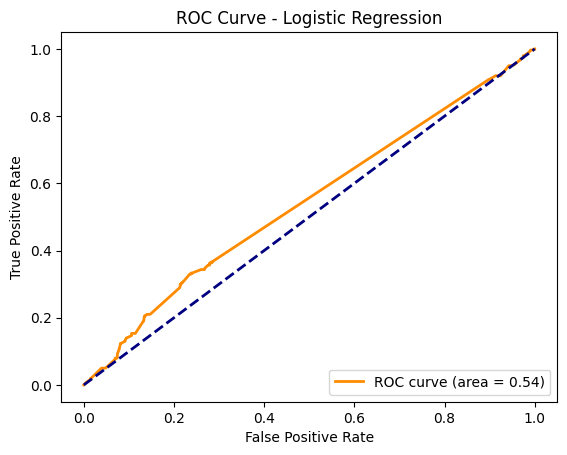

In [ ]:
# Get probabilities for Logistic Regression (required for ROC curve)
y_pred_proba_logreg = logreg.predict_proba(X_test)
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test_binary, y_pred_proba_logreg, "Logistic Regression")

In [ ]:
# Get probabilities for SVM (required for ROC curve)
y_pred_proba_svm = svm.predict_proba(X_test)

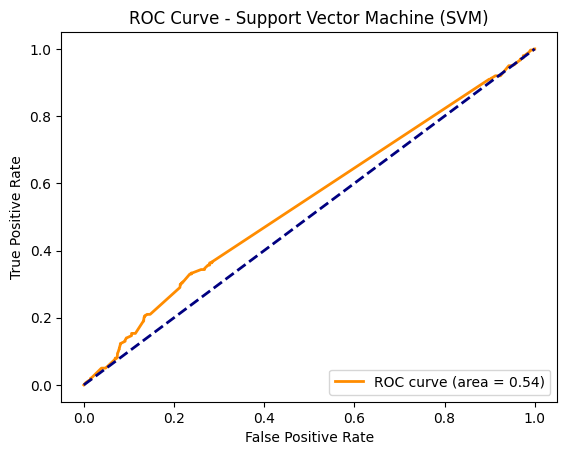

In [ ]:
# Plot ROC curve for SVM
plot_roc_curve(y_test_binary, y_pred_proba_svm, "Support Vector Machine (SVM)")

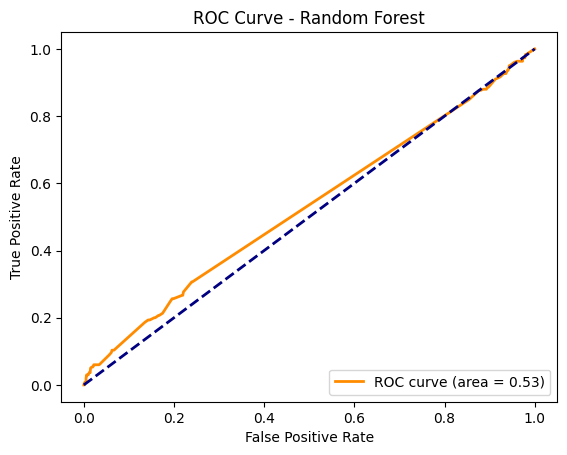

In [ ]:
# Get probabilities for Random Forest (required for ROC curve)
y_pred_proba_rf = rf.predict_proba(X_test)
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_binary, y_pred_proba_rf, "Random Forest")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
X_text = data['cleaned_text']  # Cleaned text features
X_numeric = data.drop(['price_movement', 'cleaned_text'], axis=1)  # Numeric features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Train the model
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Accuracy:", accuracy_score(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Epoch 1/10
214/214 [==============================] - 2s 6ms/step - loss: 0.3952 - accuracy: 0.8098 - val_loss: 0.2665 - val_accuracy: 0.8331
Epoch 2/10
214/214 [==============================] - 1s 5ms/step - loss: 0.2476 - accuracy: 0.8549 - val_loss: 0.2542 - val_accuracy: 0.8472
Epoch 3/10
214/214 [==============================] - 1s 5ms/step - loss: 0.2180 - accuracy: 0.8845 - val_loss: 0.2625 - val_accuracy: 0.8460
Epoch 4/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1943 - accuracy: 0.9005 - val_loss: 0.2752 - val_accuracy: 0.8501
Epoch 5/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1674 - accuracy: 0.9195 - val_loss: 0.3080 - val_accuracy: 0.8460
Epoch 6/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1388 - accuracy: 0.9373 - val_loss: 0.3363 - val_accuracy: 0.8495
Epoch 7/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1136 - accuracy: 0.9511 - val_loss: 0.3783 - val_accuracy: 0.8519
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0510 - accuracy: 0.9799 - val_loss: 0.5487 - val_accuracy: 0.8513
Epoch 2/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0410 - accuracy: 0.9854 - val_loss: 0.5963 - val_accuracy: 0.8484
Epoch 3/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0367 - accuracy: 0.9846 - val_loss: 0.6263 - val_accuracy: 0.8484
Epoch 4/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0295 - accuracy: 0.9886 - val_loss: 0.6775 - val_accuracy: 0.8495
Epoch 5/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0262 - accuracy: 0.9899 - val_loss: 0.7265 - val_accuracy: 0.8454
Epoch 6/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0271 - accuracy: 0.9884 - val_loss: 0.7563 - val_accuracy: 0.8495
Epoch 7/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0222 - accuracy: 0.9898 - val_loss: 0.7599 - val_accuracy: 0.8495
Epoch 

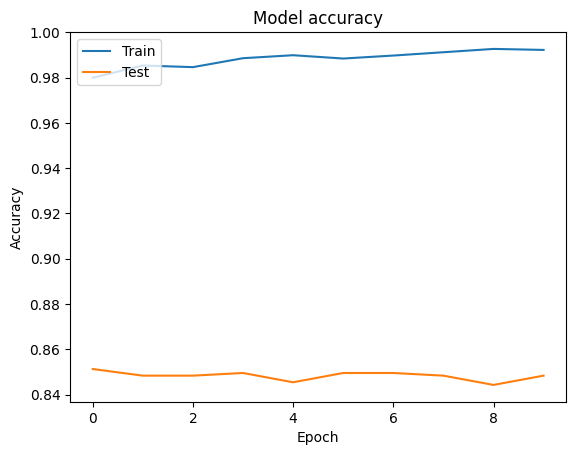

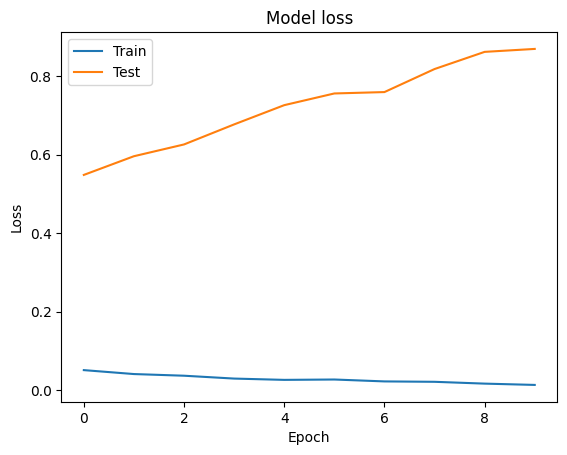

In [ ]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


In [ ]:
def aggregate_sentiment_scores(headlines_df):
    sentiment_summary = headlines_df.groupby('Date')['sentiment'].mean()
    return sentiment_summary

def generate_trading_signals(sentiment_summary):
    signals = sentiment_summary.apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
    return signals

In [ ]:
def calculate_portfolio_metrics(portfolio):
    total_trades = len(portfolio) // 2
    wins = portfolio[portfolio['type'] == 'sell']['profit'] > 0
    win_percentage = wins.mean() * 100
    total_profit = portfolio[portfolio['type'] == 'sell']['profit'].sum()

    return total_trades, win_percentage, total_profit

def calculate_sharpe_ratio(portfolio, risk_free_rate=0.01):
    daily_returns = portfolio[portfolio['type'] == 'sell']['profit']
    excess_returns = daily_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_max_drawdown(portfolio):
    portfolio['cumulative_profit'] = portfolio['profit'].cumsum()
    cumulative_max = portfolio['cumulative_profit'].cummax()
    drawdown = portfolio['cumulative_profit'] - cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

In [ ]:
import plotly.graph_objects as go

def plot_signals(stock_data, portfolio,company):
    start_date = portfolio['date'].min()
    end_date = portfolio['date'].max()

    # Filter stock data to the date range available in the portfolio
    stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

    buy_signals = portfolio[portfolio['type'] == 'buy']
    sell_signals = portfolio[portfolio['type'] == 'sell']
    fig = go.Figure()
    # Add stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='blue')
    ))

    # Add buy signals
    fig.add_trace(go.Scatter(
        x=buy_signals['date'],
        y=buy_signals['price'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=10)
    ))

    # Add sell signals
    fig.add_trace(go.Scatter(
        x=sell_signals['date'],
        y=sell_signals['price'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=10)
    ))
    # Update layout for better presentation
    fig.update_layout(
        title=f'Stock Price with Buy and Sell Signals for {company}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x'
    )
    fig.show()

In [ ]:
def simulate_trades(stock_data, trading_signals,capital,company):
    # Construct file path based on company name
    file_path = f'merged_data_{company.capitalize()}.csv'

    try:
        # Fetch news data
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return

    date = data['Date']
    portfolio = []
    position = 0
    buy_price = 0
    quantity =0
    for index, price in (stock_data['Close'].items()):
        if date[index] in trading_signals.index:
            signal = trading_signals.loc[date[index]]
            if signal == 1 and position == 0:  # Buy signal
                position = 1
                buy_price = price
                quantity = capital/price
                capital = capital%price
                portfolio.append({'date': date[index], 'type': "buy", 'price': buy_price, 'capital':capital})
            elif signal == -1 and position == 1 and (price>buy_price) :  # Sell signal
                position = 0
                sell_price = price
                profit = (sell_price - buy_price)*quantity
                capital = capital+ quantity*sell_price
                portfolio.append({'date': date[index], 'type': "sell", 'price': sell_price,'capital':capital, 'profit': profit})

    return pd.DataFrame(portfolio)


In [ ]:
import pandas as pd

def final(rate, initial, company):
    # Construct file path based on company name
    file_path = f'merged_data_{company.capitalize()}.csv'

    try:
        # Fetch news data
        news_data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return

    # Assuming 'Date' and 'sentiment' columns exist in news_data
    news_data_with_scores = news_data[['Date', 'sentiment']]

    # Aggregate sentiment scores by date
    sentiment_summary = aggregate_sentiment_scores(news_data_with_scores)

    # Generate trading signals
    trading_signals = generate_trading_signals(sentiment_summary)

    # Simulate trades
    print(f"\nSimulating trades for {company.capitalize()}...")
    portfolio = simulate_trades(news_data, trading_signals, initial,company)

    # Calculate portfolio metrics
    total_trades, win_percentage, total_profit = calculate_portfolio_metrics(portfolio)

    # Print the portfolio
    print(portfolio)
    print(f"\nInitial capital: ${initial}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Total Portfolio Returns: ${total_profit:.2f}")
    print(f"Sharpe ratio: {calculate_sharpe_ratio(portfolio, rate):.2f} with risk-free rate of {rate}")
    print(f"Max drawdown: {calculate_max_drawdown(portfolio)}")

    # Plot buy and sell signals
    plot_signals(news_data, portfolio,company)


In [ ]:
final(0.03, 10000,'Google')


Simulating trades for Microsoft...
         date  type       price       capital       profit
0  2020-01-23   buy  166.720001    163.519928          NaN
1  2020-06-09  sell  189.800003  11547.877033  1384.357105
2  2020-08-18   buy  211.490005    127.416737          NaN
3  2020-12-23  sell  221.020004  12195.655259   520.361488
4  2020-12-16   buy  219.279999    135.255326          NaN
5  2021-08-27  sell  299.720001  16804.727368  4473.816783
6  2021-08-24   buy  302.619995    160.627636          NaN
7  2021-11-01  sell  329.369995  18450.803633  1485.448630
8  2021-12-17   buy  323.799988    318.004317          NaN

Initial capital: $10000
Total Trades: 4
Win Percentage: 100.00%
Total Portfolio Returns: $7863.98
Sharpe ratio: 1.14 with risk-free rate of 0.03
Max drawdown: 0.0
